# Analysing who will leave organization using Logistic Regression

#Dataset is downloaded from kaggle: https://www.kaggle.com/datasets/giripujar/hr-analytics

In following code we are going to analyse HR employee data:

 we will check data and important factors that we need
 
 we keep factors that are affecting employee, further analyse it
 
 will create a Logistic regrassion model for predicting who will Leave organization

In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load file using pandas
df = pd.read_csv('HR.csv')

# Lets Explore Dataset

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [18]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [6]:
df.shape

(14999, 10)

In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
#Handling Null values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

# Analysing Data

In [10]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [11]:
df.groupby('left').mean().T

left,0,1
satisfaction_level,0.666810,0.440098
last_evaluation,0.715473,0.718113
number_project,3.786664,3.855503
average_montly_hours,199.060203,207.419210
time_spend_company,3.380032,3.876505
Work_accident,0.175009,0.047326
promotion_last_5years,0.026251,0.005321


From above tables, we can draw conclusion that:

**satisfaction_level** : Satisfaction level seems to be low(0.44) in employee leaving org Vs retained(0.66)

**average_monthly_hours** : Higher in employees leaving the firm

**promotion_last_5years** : Employees who got promoted are likely to be retained

# Visualizing data
Impact of Salary on retention

<AxesSubplot:xlabel='salary', ylabel='count'>

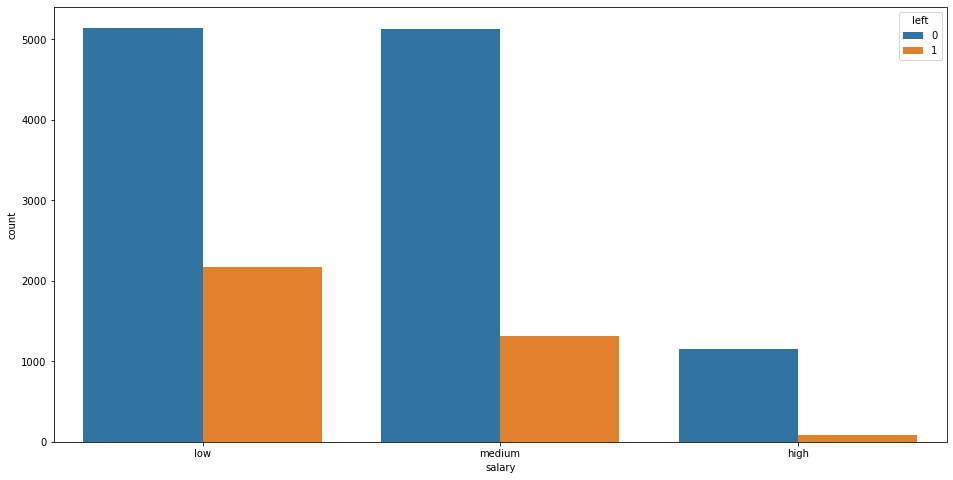

In [14]:
plt.figure(figsize=(16,8))
sns.countplot(data=df, x='salary', hue='left')

By Observing above graph, we can say that Higher salary employees likely to not leave firm

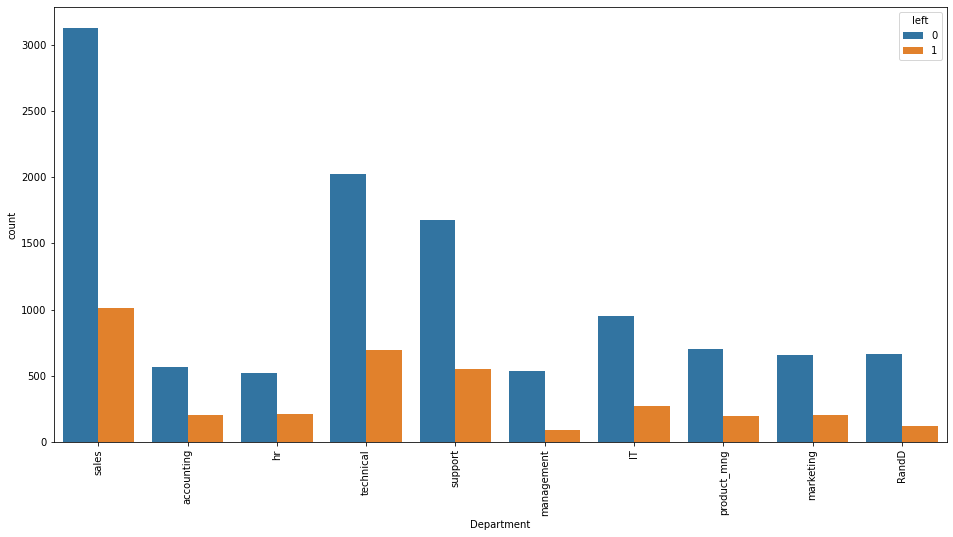

In [17]:
#By Observing above graph, we can say that Higher salary employees likely to not leave firm
plt.figure(figsize=(16,8))
chart = sns.countplot(data=df, x='Department', hue='left')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
None

Department is making minor impact on employee retention, hence we will ignore this feature

# Data Analysis Conclusion
From data analysis so far we have observed and can conclude that:

1. Satisfaction Level
2. Average Monthly Hours
3. Promotion Last 5 years
4. Salary

In [20]:
# we will create new dataframe containing features that we want
new_df = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]

In [21]:

new_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


# Handling salary column
salary column contains text data. which is incompatible for machine learning.
Hence we will use **pandas.get_dummies** method to convert it into numbers.

In [26]:
salary_dummies = pd.get_dummies(new_df.salary, prefix='salary')


In [27]:
df_dummies = pd.concat([new_df,salary_dummies],axis='columns')

In [28]:
df_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [29]:
df_dummies.drop('salary', axis='columns', inplace=True)
df_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


# Model Building

In [30]:
# lets create our X and y datasets (input and target)
X = df_dummies
y = df.left

In [31]:
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [32]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [33]:
# splitting datasets into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [34]:
len(X_train)

11999

In [35]:
len(X_test)

3000

# Logistic Regression Model

In [36]:
# import logistic regression classifier
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [37]:
model.fit(X_train,y_train)

LogisticRegression()

In [38]:
y_pred=model.predict(X_test)

In [43]:
#checking score of model
model.score(X_test,y_test)

0.768